In [1]:
from pathlib import Path
from os.path import join

from eye_tracking_utils import get_first_white_screen
from eye_tracking_utils import get_code_coordinates
from eye_tracking_utils import get_char_coordinates
from eye_tracking_utils import get_tot_n_frames

Scraping participant:  UconsumerU
../participants/UconsumerU/video_export_07-26-22-15.10.45_UconsumerU 0.avi
../participants/UconsumerU/frames


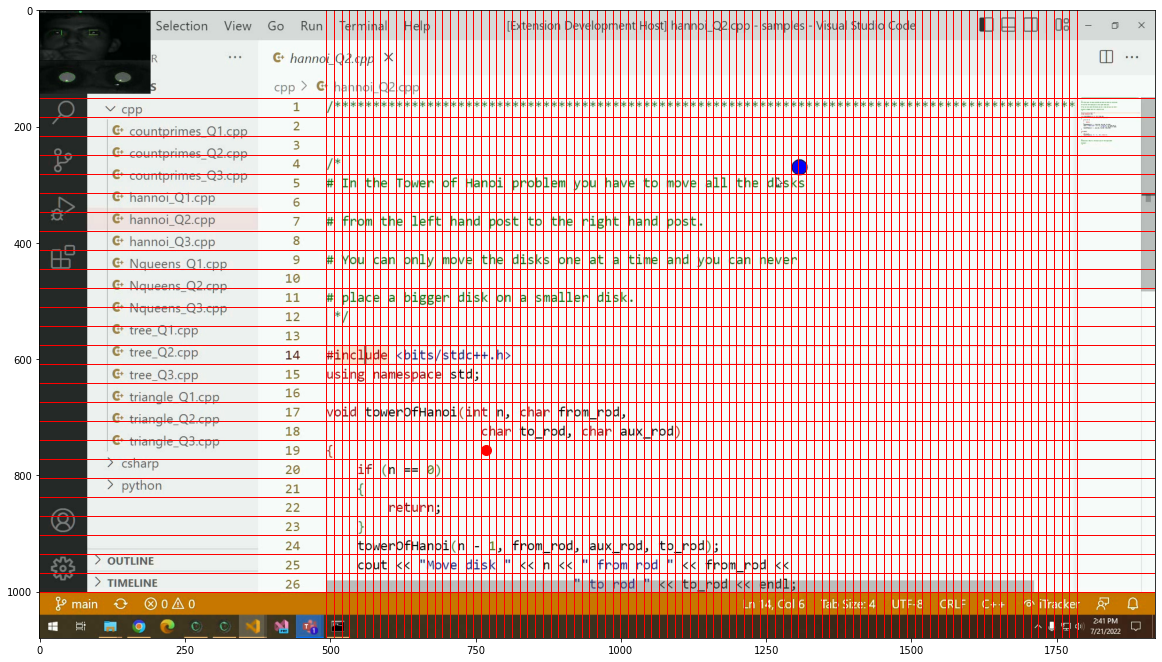

Scraping participant:  UquarterU
../participants/UquarterU/video_export_07-26-22-15.06.28_UquarterU 2.avi
../participants/UquarterU/frames


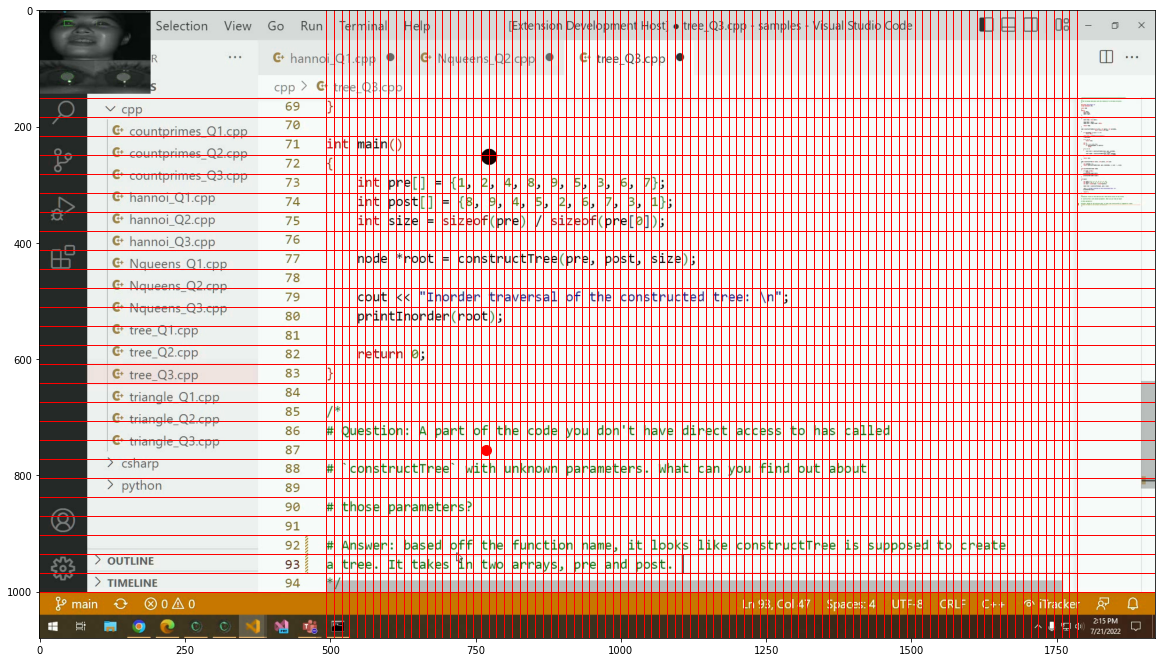

Scraping participant:  UpassionU
../participants/UpassionU/video_export_07-26-22-15.25.16_User 0.avi
../participants/UpassionU/frames


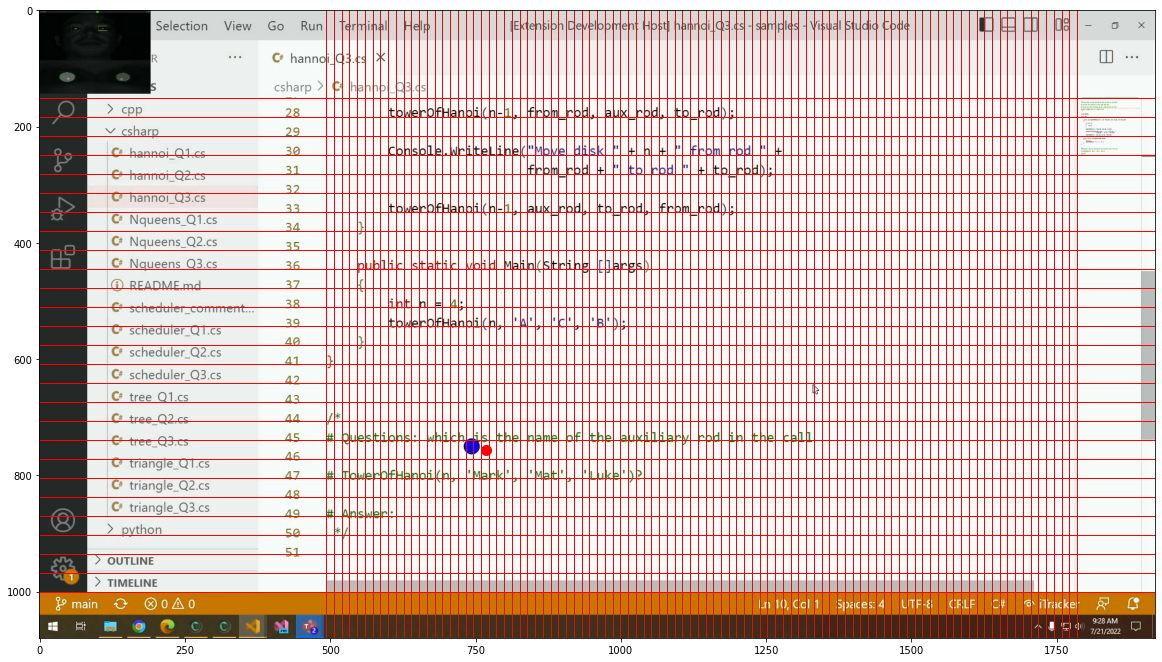

Scraping participant:  UmonkU
../participants/UmonkU/video_export_07-26-22-14.43.44.avi
../participants/UmonkU/frames


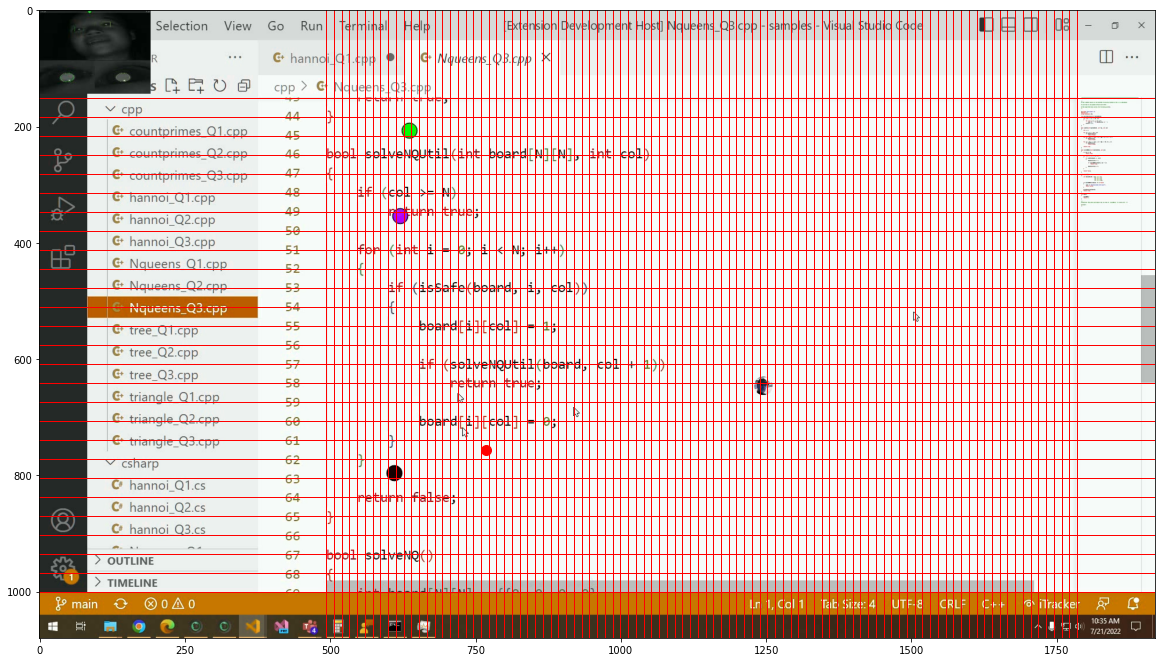

Scraping participant:  UsalvationU
../participants/UsalvationU/video_export_07-20-22-14.00.38_User 1.avi
../participants/UsalvationU/frames


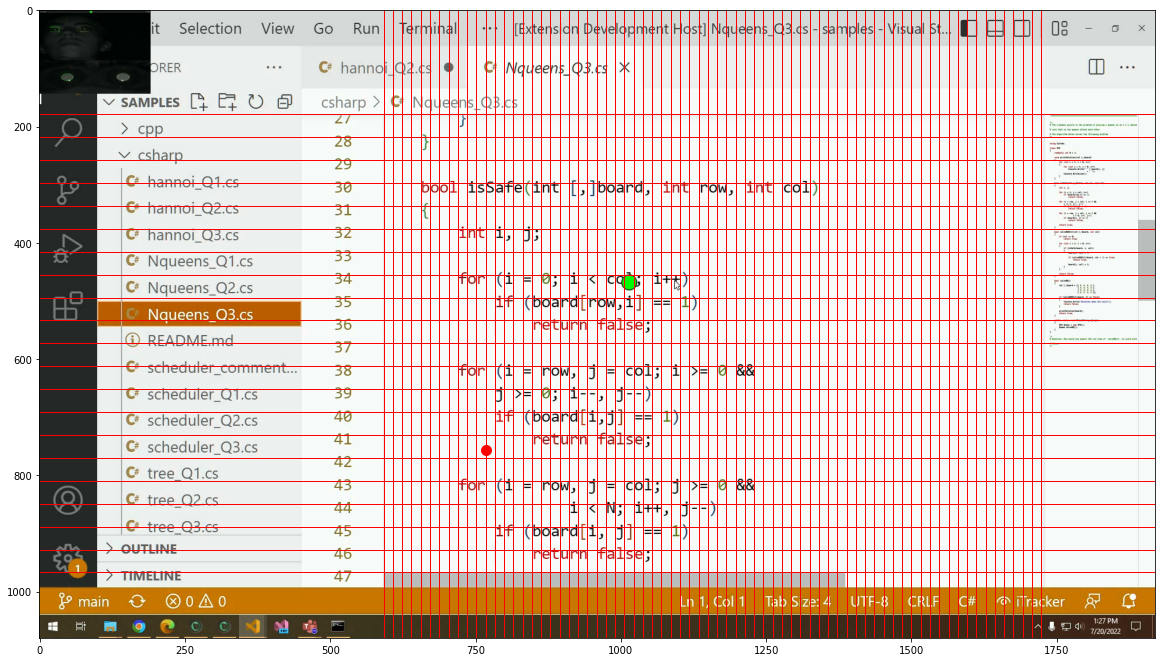

Scraping participant:  UimproveU
../participants/UimproveU/video_export_07-20-22-15.58.16_UimproveU1.avi
../participants/UimproveU/frames


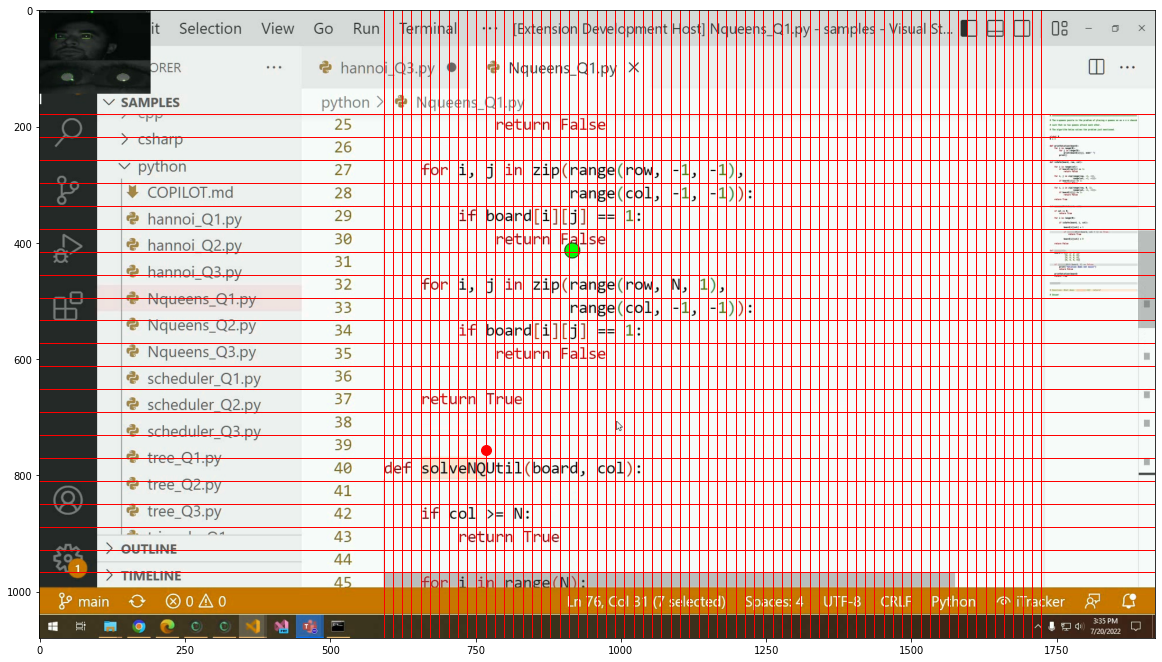

Scraping participant:  UcharterU
../participants/UcharterU/video_export_07-20-22-11.48.27_UcharterU3.avi
../participants/UcharterU/frames


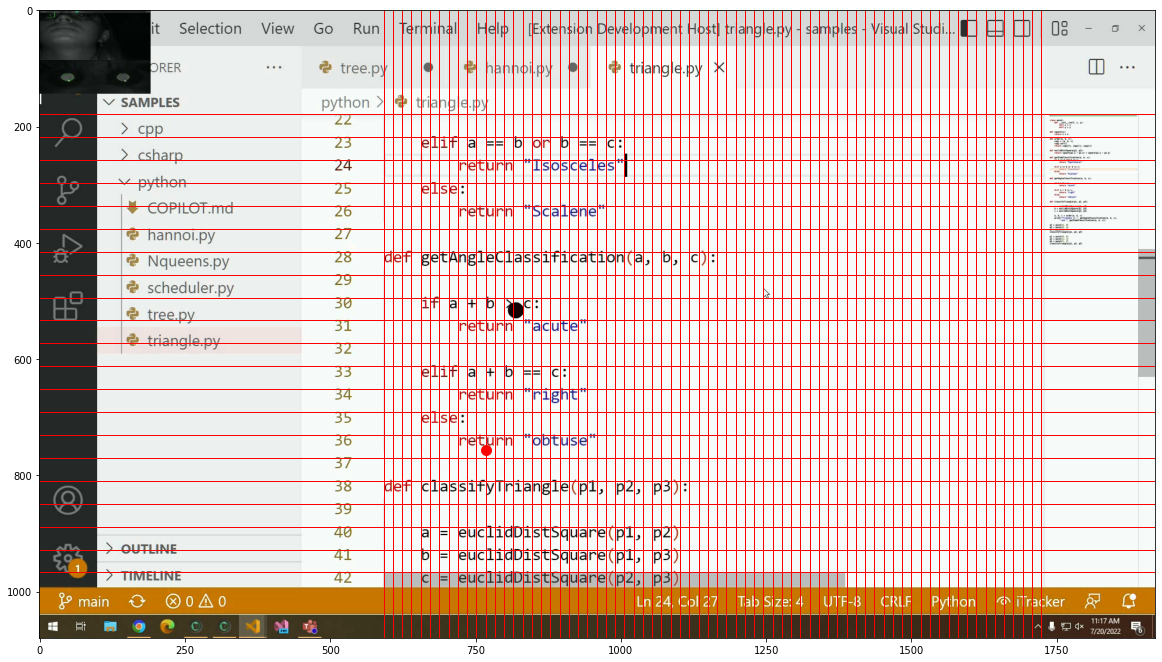

Scraping participant:  UpopU
../participants/UpopU/video_export_07-20-22-11.57.17_UpopU2.avi
../participants/UpopU/frames


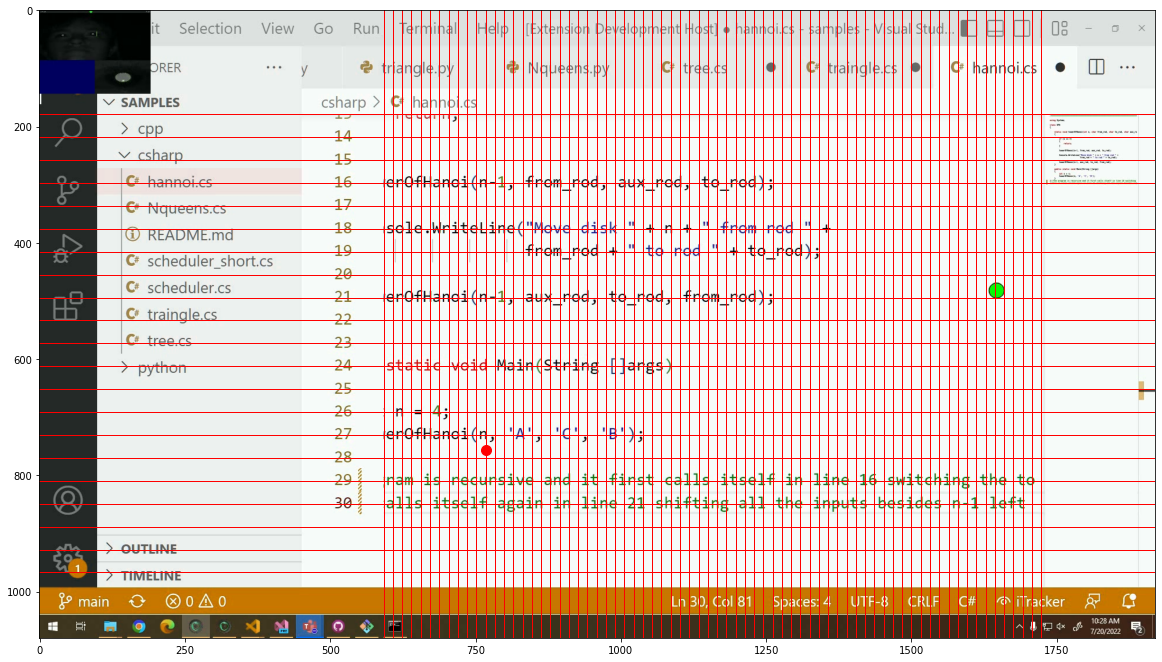

In [2]:
# depending on the user we have different market depending on their zoom
# level, either medium or large
VALID_USERNAMES_AND_ZOOM = [
    ["UconsumerU", "M"],
    ["UquarterU", "M"],
    ["UpassionU", "M"],
    ["UmonkU", "M"],
    ["UsalvationU", "L"],
    ["UimproveU", "L"],
    ["UcharterU", "L"],
    ["UpopU", "L"],
]

# %%
# iterate over all the participants
for participant_name, zoom_level in VALID_USERNAMES_AND_ZOOM:
    print("Scraping participant: ", participant_name)
    # get the path of the first avi file of the participant
    path_participant = Path(join("..", "participants", participant_name))
    try:
        video_path = list(path_participant.glob("*.avi"))[0]
    except IndexError:
        print("Skipping video: ", path_participant, " because of lack of video footage.")
    print(video_path)
    # get the path of the folder where the frames will be saved
    output_folder = join(str(path_participant), "frames")
    print(output_folder)
    # get video data
    video_data = get_tot_n_frames(video_path)
    mid_frame = int(video_data["tot_n_frames"] / 2)
    # get the screenshot of the first frame of the video
    img, screen_path = get_first_white_screen(
        video_path=str(video_path),
        output_folder=output_folder,
        start_frame=mid_frame)


    if zoom_level == "M":
        code_screen_coordinate_abs = get_code_coordinates(
            screenshot_path=screen_path,
            path_marker_top_left="../markers/top_left_marker.png",
            path_marker_bottom_right="../markers/bottom_right_marker.png",
            top_left_offsets=(182, 109),
            bottom_right_offsets=(107, 6),
            percentage_format=False,
            debug=False)

        get_char_coordinates(
            eye_x_perc=0.4, eye_y_perc=0.7,
            pixel_screen_width=1920, pixel_screen_height=1080,
            screen_path=screen_path,
            n_lines=26,
            n_col=97,
            debug=True,
            **code_screen_coordinate_abs)
    elif zoom_level == "L":
        code_screen_coordinate_abs = get_code_coordinates(
            screenshot_path=screen_path,
            path_marker_top_left="../markers/top_left_marker_zoomed.png",
            path_marker_bottom_right="../markers/bottom_right_marker_zoomed.png",
            top_left_offsets=(220, 125),
            bottom_right_offsets=(90, -25),
            percentage_format=False,
            debug=False)

        get_char_coordinates(
            eye_x_perc=0.4, eye_y_perc=0.7,
            pixel_screen_width=1920, pixel_screen_height=1080,
            screen_path=screen_path,
            n_lines=20,
            n_col=71,
            debug=True,
            **code_screen_coordinate_abs)
